# Cookbook 1 - Computing the spectra for some tracers and catalogs

Here we provide a recipe, detailing the functionality available in our set of packages, to compute the power spectra from some [ExSHalos](https://arxiv.org/abs/1906.06630) maps: halo mocks generated at fixed redshift

### 0) Including the libraries

In [1]:
from catalog_specs import cat_specs #to set the catalog specifications
from cosmo import cosmo #to set the cosmology
from code_options import code_parameters #to set the cosmological parameters
from converting_cats_in_cats_of_bins import * #To convert any tracer catalog according to bins of mass
from colossus.cosmology import cosmology #To compute bias
from colossus.lss import bias #To compute bias
from create_grids_from_xyz_cats_beta import * #to build the cats
from MTPK_estimate_beta import * #to estimate the spectra
import numpy as np
import matplotlib.pyplot as plt

### 1) Instantiating the parameters

The fiducial **specifications** about the **catalogs** are given by:

In [2]:
cat_specs = cat_specs()
cat_specs.parameters_print()

ntracers = 3
n_maps = 4
col_m = 6
col_x = 0
col_y = 1
col_z = 2
x_cat_min = 0.0
y_cat_min = 0.0
z_cat_min = 0.0
x_cat_max = 128.0
y_cat_max = 128.0
z_cat_max = 128.0
m_min = 11.5
m_max = 13.0


The **fiducial cosmology** is given by (defined according to [Planck 2018](https://arxiv.org/abs/1807.06209)):

In [3]:
my_cosmology = cosmo()
my_cosmology.parameters_print()

h = 0.678
Omega0_b = 0.048206
Omega0_cdm = 0.2589
Omega0_k = 0.0
Omega0_DE = 0.692894
A_s = 2.1867466842075255e-09
ln10e10AsA = 3.085
n_s = 0.96
w0 = -1.0
w1 = 0.0
z_re = 9.99999
flat = True
gamma = 0.5454
matgrow = 1e-05
zcentral = 1.0
c_light = 299792.458


### You can change the parameters giving:

Simple change:

In [4]:
my_cosmology = cosmo(h = 0.72)
my_cosmology.parameters_print()

h = 0.72
Omega0_b = 0.048206
Omega0_cdm = 0.2589
Omega0_k = 0.0
Omega0_DE = 0.692894
A_s = 2.1867466842075255e-09
ln10e10AsA = 3.085
n_s = 0.96
w0 = -1.0
w1 = 0.0
z_re = 9.99999
flat = True
gamma = 0.5454
matgrow = 1e-05
zcentral = 1.0
c_light = 299792.458


Using the `methods` of the class:

In [5]:
mg_evol = cosmo().f_evolving(0)
mg_phe = cosmo().f_phenomenological()
mg_evol, mg_phe

(0.5252511834620611, 0.5252511834620611)

In [6]:
my_cosmology = cosmo(matgrow = mg_evol)
my_cosmology.parameters_print()

h = 0.678
Omega0_b = 0.048206
Omega0_cdm = 0.2589
Omega0_k = 0.0
Omega0_DE = 0.692894
A_s = 2.1867466842075255e-09
ln10e10AsA = 3.085
n_s = 0.96
w0 = -1.0
w1 = 0.0
z_re = 9.99999
flat = True
gamma = 0.5454
matgrow = 0.5252511834620611
zcentral = 1.0
c_light = 299792.458


### 2) Spliting the catalogs in bins

One of the main characteristics of the `MTPK` package is to compute the power spectra for different tracers. Here we present a library to split them according to tracer mass. The parameters can be given according to:

In [7]:
#This method print the parameters from this class
converting_cats_in_cats_of_bins().params_print()

cats = ['data/ExSHalos/L128_000_halos.dat', 'data/ExSHalos/L128_001_halos.dat', 'data/ExSHalos/L128_002_halos.dat', 'data/ExSHalos/L128_003_halos.dat']
skiprows = 1
path_to_save = data/ExSHalos/


Then, you can instantiate the params according to your choices. For example:

In [8]:
sp_bins = converting_cats_in_cats_of_bins()
sp_bins

In [9]:
MF = sp_bins.to_bins(cat_specs)
MF

Catalogs created!


array([0.01251531, 0.00373197, 0.00072038])

The central masses per bin are given using the `method`:

In [10]:
m_ctrs = sp_bins.central_masses(cat_specs)
m_ctrs

array([11.81830105, 12.31830105, 12.81830105])

To compute an estimative for the bias of each halo bin we can use the `Colossus` library:

In [11]:
#Setting the cosmology
my_cosmo = {'flat': True, 'H0': 67.8, 'Om0': 0.048206 + 0.2589, 
            'Ob0': 0.048206, 'sigma8': 0.8248, 'ns': 0.96}
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)

In [12]:
b = []
for i in range( len(m_ctrs) ):
    b.append( bias.haloBias(10**m_ctrs[i], model = 'tinker10', z = 1, mdef = 'vir') )
b

[1.1933325561403523, 1.4780776169743604, 1.9418566932415513]

### 3) Setting `MTPK code` options

Using the computed _mass function_ and _bias_

In [13]:
#Defining the code options
my_code_options = code_parameters(method = 'both',
                                  mas_method = 'CIC',
                                  multipoles_order = 4,
                                  do_cross_spectra = True, 
                                  ntracers = 3,
                                  mass_fun = MF,
                                  tracer_bias = np.array(b))

In [14]:
my_code_options.parameters_print()

verbose = False
method = both
mas_method = CIC
ntracers = 3
use_kdip_phys = False
kdip_phys = 0.005
multipoles_order = 4
do_cross_spectra = True
use_padding = False
padding_length = [10, 10, 10]
use_theory_spectrum = False
theory_spectrum_file = theory_spectrum_file.txt
use_mask = False
mask_filename = mask.hdf5
mass_fun = [0.01251531 0.00373197 0.00072038]
tracer_bias = [1.19333256 1.47807762 1.94185669]
cell_size = 1.0
n_x = 128
n_y = 128
n_z = 128
n_x_orig = -64.0
n_y_orig = -64.0
n_z_orig = 10000.0
sel_fun_data = False
sel_fun_file = sel_fun-N128_halos.hdf5
kmin_bias = 0.05
kmax_bias = 0.15
kph_central = 0.1
dkph_bin = 0.01
use_kmin_phys = False
kmin_phys = 0.05
use_kmax_phys = True
kmax_phys = 1.0
whichspec = 1
k_min_CAMB = 0.0001
k_max_CAMB = 1.0
split_tracers = False
tracer_bins = [3.16e+11 1.00e+12 3.16e+12 1.00e+13]
mask_spillover_cells = False
batch_size = 1000000
wrap = False


### 4) Creating the catalogs

You can create the cats using `create_grids_from_xyz_cats_beta`

In [15]:
#User definitions about where to do each thing
input_filename = 'ExSHalos'
filenames_catalogs = 'data/ExSHalos/seed*.dat'
dir_out = "maps/sims/ExSHalos/"

In [16]:
create_grids_from_xyz_cats(cat_specs, my_cosmology, my_code_options, 
                           input_filename, filenames_catalogs, dir_out)

Done!


### 5) Estimating the spectra

You can estimate the spectra using the function inside `MTPK_estimate_beta` code. The `handle_data` is the same as the `input_file_name`

In [17]:
#Some user options
handle_data = "ExSHalos"
dir_maps = 'maps/sims/ExSHalos/'
dir_data = 'maps/data/ExSHalos/'
dir_specs = 'spectra/ExSHalos/'

In [18]:
MTPK_estimate(cat_specs, my_cosmology, my_code_options, dir_maps, dir_data, dir_specs, handle_data = handle_data)

Done!


### 6) Some plots

In [19]:
# Taking data
P0_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_P0_FKP.dat')
P0_MT = np.loadtxt('spectra/ExSHalos/ExSHalos_P0_MTOE.dat')

P2_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_P2_FKP.dat')
P2_MT = np.loadtxt('spectra/ExSHalos/ExSHalos_P2_MTOE.dat')

P4_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_P4_FKP.dat')
P4_MT = np.loadtxt('spectra/ExSHalos/ExSHalos_P4_MTOE.dat')

C0_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_C0_FKP.dat')
C2_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_C2_FKP.dat')
C4_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_C4_FKP.dat')

k = np.loadtxt('spectra/ExSHalos/ExSHalos_vec_k.dat')

In [20]:
n_bins = cat_specs.ntracers
n_cats = cat_specs.n_maps
n_k = k.shape[0]

P0_FKP = P0_FKP.reshape(n_bins, n_cats, n_k)
P0_MT = P0_MT.reshape(n_bins, n_cats, n_k)

P2_FKP = P2_FKP.reshape(n_bins, n_cats, n_k)
P2_MT = P2_MT.reshape(n_bins, n_cats, n_k)

P4_FKP = P4_FKP.reshape(n_bins, n_cats, n_k)
P4_MT = P4_MT.reshape(n_bins, n_cats, n_k)

C0_FKP = C0_FKP.reshape(n_bins, n_cats, n_k)
C2_FKP = C2_FKP.reshape(n_bins, n_cats, n_k)
C4_FKP = C4_FKP.reshape(n_bins, n_cats, n_k)

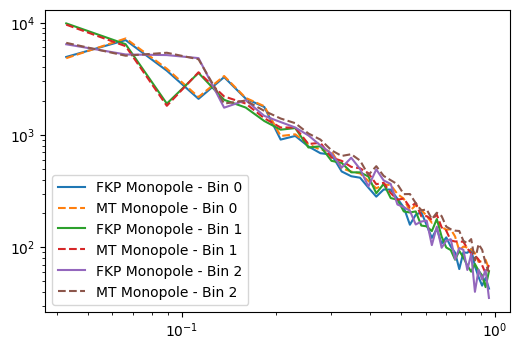

In [21]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.loglog(k, np.mean(P0_FKP, axis = 1)[i], label = f'FKP Monopole - Bin {i}')

    plt.loglog(k, np.mean(P0_MT, axis = 1)[i], '--', label = f'MT Monopole - Bin {i}')
    plt.legend()

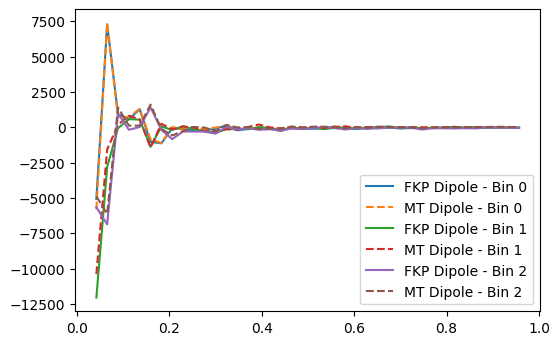

In [22]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.plot(k, np.mean(P2_FKP, axis = 1)[i], label = f'FKP Dipole - Bin {i}')

    plt.plot(k, np.mean(P2_MT, axis = 1)[i], '--', label = f'MT Dipole - Bin {i}')
    plt.legend()

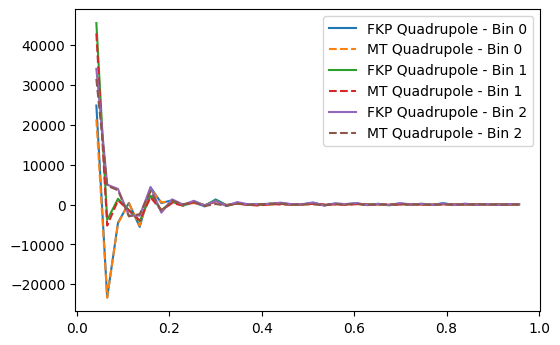

In [23]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.plot(k, np.mean(P4_FKP, axis = 1)[i], label = f'FKP Quadrupole - Bin {i}')

    plt.plot(k, np.mean(P4_MT, axis = 1)[i], '--', label = f'MT Quadrupole - Bin {i}')
    plt.legend()

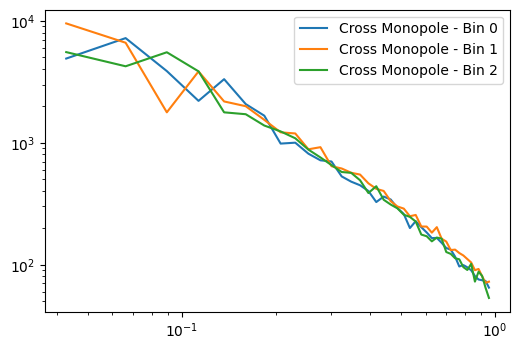

In [24]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.loglog(k, np.mean(C0_FKP, axis = 1)[i], label = f'Cross Monopole - Bin {i}')
    plt.legend()

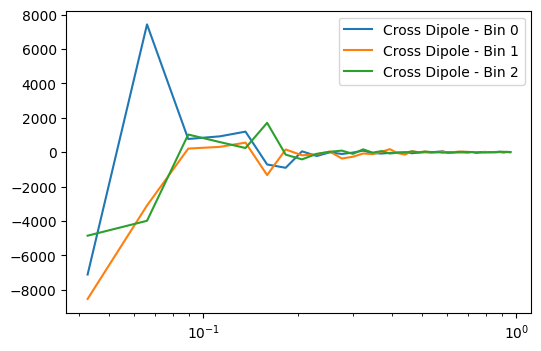

In [25]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.plot(k, np.mean(C2_FKP, axis = 1)[i], label = f'Cross Dipole - Bin {i}')
    plt.xscale('log')
    plt.legend()